<strong>Context</strong>
The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

<strong>Content</strong>
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."
<strong>
    Columns are:-
 1. InvoiceNo--> The Bill 
 2. StockCode ---> Product Code
 3. Description ---> Product Description
 4. Quantity---> Quantity Purchased
 5. InvoiceDate---> Bill Date
 6. UnitPrice----> Price
 7. CustomerID---> Id  of Customer
 8. Country----? Country Product sold.
    </strong>

## Importing the Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
df=pd.read_csv('Ecommerce_data.csv',encoding= 'ISO-8859-1')

## Basic Data Exploration
### Checking for Central Tendency Measure also called 6 Point Summary

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## EDA

<strong>
The major steps to be covered for EDA are below: <br>
1.Handle Missing value <br>
2.Removing duplicates<br>
3.Outlier Treatment<br>
4.Normalizing and Scaling( Numerical Variables)<br>
5.Encoding Categorical variables( Dummy Variables)<br>
6.Bivariate Analysis
</strong>

### Handle Missing value 

In [8]:
## Checking for missing values.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [40]:
df.isnull().count()

InvoiceNo      541909
StockCode      541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64

In [9]:
## Dropping the Description column 
#Same data can be found from Stock Code.

df.drop('Description',axis='columns', inplace=True)

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
# Ignoring the CustomerID missing values.
# Checking for unique values in customer Id.
print(df['CustomerID'].nunique())

4372


In [13]:
## Checking for missing values.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 2.Removing duplicates

In [14]:
# checking for duplicates.
duplicate_rows = df[df.duplicated()]

In [15]:
duplicate_rows.count()

InvoiceNo      5270
StockCode      5270
Quantity       5270
InvoiceDate    5270
UnitPrice      5270
CustomerID     5227
Country        5270
dtype: int64

In [16]:
df.shape

(541909, 7)

In [17]:
## Dropping the duplicate values.
df1 = df.drop_duplicates()

In [18]:
df1.shape

(536639, 7)

In [27]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

### 3.Outlier Treatment

In [19]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

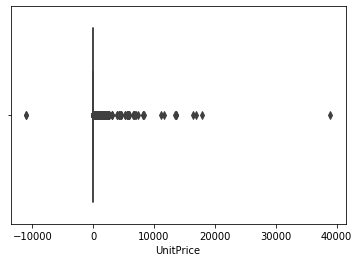

In [24]:
# Plotting a box plot to check the outliers.
sns.boxplot(df1['UnitPrice'])
plt.show()

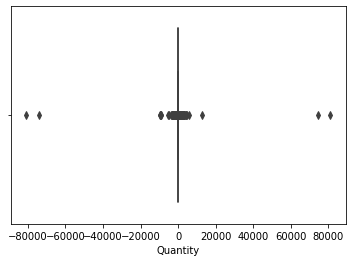

In [25]:
# Plotting a box plot to check the outliers.
sns.boxplot(df1['Quantity'])
plt.show()

In [26]:
print(df['Country'].nunique())
print(df['Country'].unique())

38
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [32]:
print(df[["InvoiceNo", "Country"]].groupby('Country').count())

                      InvoiceNo
Country                        
Australia                  1259
Austria                     401
Bahrain                      19
Belgium                    2069
Brazil                       32
Canada                      151
Channel Islands             758
Cyprus                      622
Czech Republic               30
Denmark                     389
EIRE                       8196
European Community           61
Finland                     695
France                     8557
Germany                    9495
Greece                      146
Hong Kong                   288
Iceland                     182
Israel                      297
Italy                       803
Japan                       358
Lebanon                      45
Lithuania                    35
Malta                       127
Netherlands                2371
Norway                     1086
Poland                      341
Portugal                   1519
RSA                          58
Saudi Ar

In [33]:
df.groupby('CustomerID').count().sort_values("InvoiceNo", ascending=False)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,
17841.0,7983,7983,7983,7983,7983,7983
14911.0,5903,5903,5903,5903,5903,5903
14096.0,5128,5128,5128,5128,5128,5128
12748.0,4642,4642,4642,4642,4642,4642
14606.0,2782,2782,2782,2782,2782,2782
...,...,...,...,...,...,...
14119.0,1,1,1,1,1,1
13747.0,1,1,1,1,1,1
15590.0,1,1,1,1,1,1


In [34]:
df.groupby('Country').count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,
Australia,1259,1259,1259,1259,1259,1259
Austria,401,401,401,401,401,401
Bahrain,19,19,19,19,19,17
Belgium,2069,2069,2069,2069,2069,2069
Brazil,32,32,32,32,32,32
Canada,151,151,151,151,151,151
Channel Islands,758,758,758,758,758,758
Cyprus,622,622,622,622,622,622
Czech Republic,30,30,30,30,30,30


In [35]:
df.groupby('Country').count() & df.Country=="France"

TypeError: Cannot perform 'and_' with a dtyped [float64] array and scalar of type [bool]

In [36]:
df[df['Country']=='France']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,24,12/1/2010 8:45,3.75,12583.0,France
27,536370,22727,24,12/1/2010 8:45,3.75,12583.0,France
28,536370,22726,12,12/1/2010 8:45,3.75,12583.0,France
29,536370,21724,12,12/1/2010 8:45,0.85,12583.0,France
30,536370,21883,24,12/1/2010 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


### df[df['Country']=='France'].to_excel('France.xlsx')

In [ ]:
len(df['CustomerID'])

In [37]:
df['CustomerID'].dropna()

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 406829, dtype: float64

In [38]:
x= df['CustomerID'].unique()

In [39]:
len(x)

4373

### 6.Bivariate Analysis

<strong> Numerical vs. Numerical
1. Scatterplot

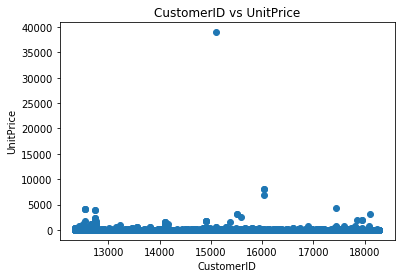

In [28]:
plt.scatter(df1.CustomerID,df1.UnitPrice)

plt.title('CustomerID vs UnitPrice')

plt.xlabel('CustomerID')

plt.ylabel('UnitPrice')

plt.show()

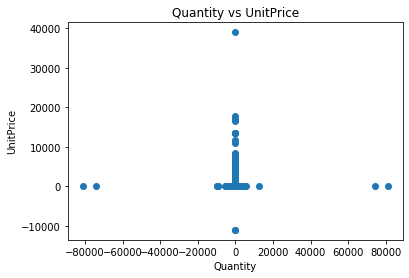

In [29]:
plt.scatter(df1.Quantity,df1.UnitPrice)

plt.title('Quantity vs UnitPrice')

plt.xlabel('Quantity')

plt.ylabel('UnitPrice')

plt.show()

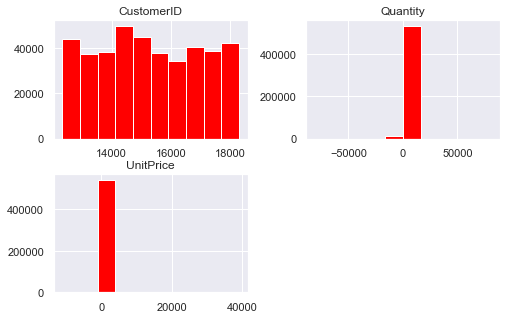

In [30]:
sns.set()
df.hist(figsize=(8,5), color='red')
plt.show()

C:\Users\ebineet\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


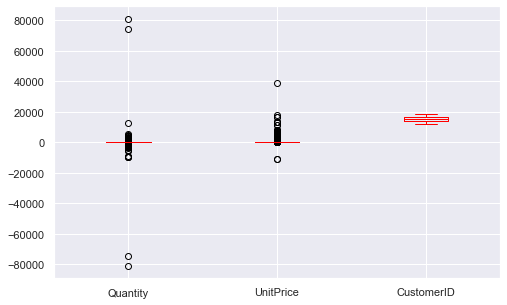

In [31]:
sns.set()
df.boxplot(figsize=(8,5), color='red')
plt.show()